# Week11 Classification & Decision Tree

We continued learning other algorithms of Supervised Learning. Classification belongs to the category of supervised learning where the targets also provided with the input data. 

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

A decision tree is a largely used non-parametric effective machine learning modeling technique for regression and classification problems. To find solutions a decision tree makes sequential, hierarchical decision about the outcomes variable based on the predictor data.

In week11, we've covered:
* **Logistic Regression, Stochastic Gradient Descent**
* **Decision Tree**


The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week11_classification-and-decision-tree.ipynb** notebook to your local folder and open it with Jupyter Notebook.

### Data Loading and EDA

Install Python SciPy libraries (ex. `numpy`, `pandas`, `matplotlib`, `seaborn`)
    

In [ ]:
# TODO
from google.colab import drive
drive.mount('/content/drive')

Load Data

In [ ]:
# TODO
!ls /content/drive/My\ Drive/'Colab Notebooks'

In [ ]:
# TODO# TODO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

%matplotlib inline


In [ ]:
# TODO
wine = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv')
#wine = pd.read_csv('winequality-red.csv')

Summarize the dataset -- we are going to take a look at the data in a few different ways:
1. Dimensions of the dataset (Hint: use `shape`)
2. Peek at the data itself (Hint: use `head`)
3. Statistical summary of all attributes (Hint: use `describe`)
4. Breakdown of the data by the class variable (Hint: use `groupby`, `value_counts`)


Data visualization -- use seaborn to plot graphs to help you better understand this dataset

In [ ]:
# TODO
wine.shape


In [ ]:
wine.head(10)

In [ ]:
wine.describe

In [ ]:
wine.groupby("quality").mean()


In [ ]:

wine['quality'].value_counts()

In [ ]:
# TODO
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

### Data Preprocessing

Check for missing values, do you think this step is necessary and why?

In [ ]:
# TODO
wine.info()

In [39]:
# TODO
wine.isnull().values.sum()



0

In [40]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Can you think of some ways to handle missing values?

If there are missing or NAN values replace it with mean or mode by
Wine['<>'].fillna((wine['<>'].mean()), inplace=True)


Seperate the dataset as response variable and feature variabes

In [0]:
# TODO
X = wine.drop('quality', axis=1)
y=wine['quality']

Split to training set and testing set (Note: test_size = 0.25, random_state = 42)

In [0]:
# TODO
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


Apply Standard scaling to get optimized result, think of why we need to do this?

In [0]:
# TODO


### Modeling

#### Logistic Regression

Train a Binary Classifier and fit with training set

In [43]:
# TODO
lr = LogisticRegression()
lr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Perform predictions on test data

In [0]:
# Todo

y_pred = lr.predict(X_test)

We've learned that there are some caveats in the train/test split method. In order to avoid this, we can perform something called cross validation. Try K-Fold Cross Validation (ex. 10-fold)

In [49]:
# Todo
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(lr,X_train,y_train, cv=kfold,scoring = "accuracy")
cv_result



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.825     , 0.9       , 0.85833333, 0.88333333, 0.84166667,
       0.84166667, 0.9       , 0.90833333, 0.85      , 0.94117647])

Print out Confusion Matrix and explain the Four Quadrants

In [50]:
# Todo
confusion_matrix(y_test,y_pred)

array([[339,   8],
       [ 41,  12]])

What's AUC for your Logistic Regression model?

In [51]:
# Todo
roc_auc_score(y_test,y_pred)

0.6016801696481975

#### Regularized Logistic Regression

In [0]:
#A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.
#The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well 
#for feature selection in case we have a huge number of features.
#Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but these techniques 
#are a great alternative when we are dealing with a large set of features.

Build a Binary Classifier with a L2 Regularizer and print out its Confusion Matrix

In [54]:
# Todo
l2=LogisticRegression(penalty='l2')
l2.fit(X_train, y_train)
confusion_matrix(y_test,l2.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[339,   8],
       [ 41,  12]])

Build a Binary Classifier with a L1 Regularizer and print out its Confusion Matrix

In [56]:
# Todo
l1=LogisticRegression(penalty='l1')
l1.fit(X_train, y_train)
confusion_matrix(y_test,l1.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[337,  10],
       [ 38,  15]])

What's the difference between L1 regularization and L2 regularization?

In [57]:
# Todo
#A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.
#The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well 
#for feature selection in case we have a huge number of features.
#Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but these techniques 
#are a great alternative when we are dealing with a large set of features.
print('L2 AUC: %f' %roc_auc_score(y_test,l2.predict(X_test)))
print('L1 AUC: %f' %roc_auc_score(y_test,l1.predict(X_test)))

L2 AUC: 0.601680
L1 AUC: 0.627100


#### SGD

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The advantages of Stochastic Gradient Descent are:

Efficiency.
Ease of implementation (lots of opportunities for code tuning).
The disadvantages of Stochastic Gradient Descent include:

SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
SGD is sensitive to feature scaling.

Fit a SGD model and perform predictions on test set

In [0]:
# Todo
# Todo
sgd=SGDClassifier(random_state=0)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)


#### Decision Tree

Build a Decision Tree Classifier and perform predictions on test set

In [0]:
# TODO
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

Is there an overfitting issue? How can you tell and how could you solve it?

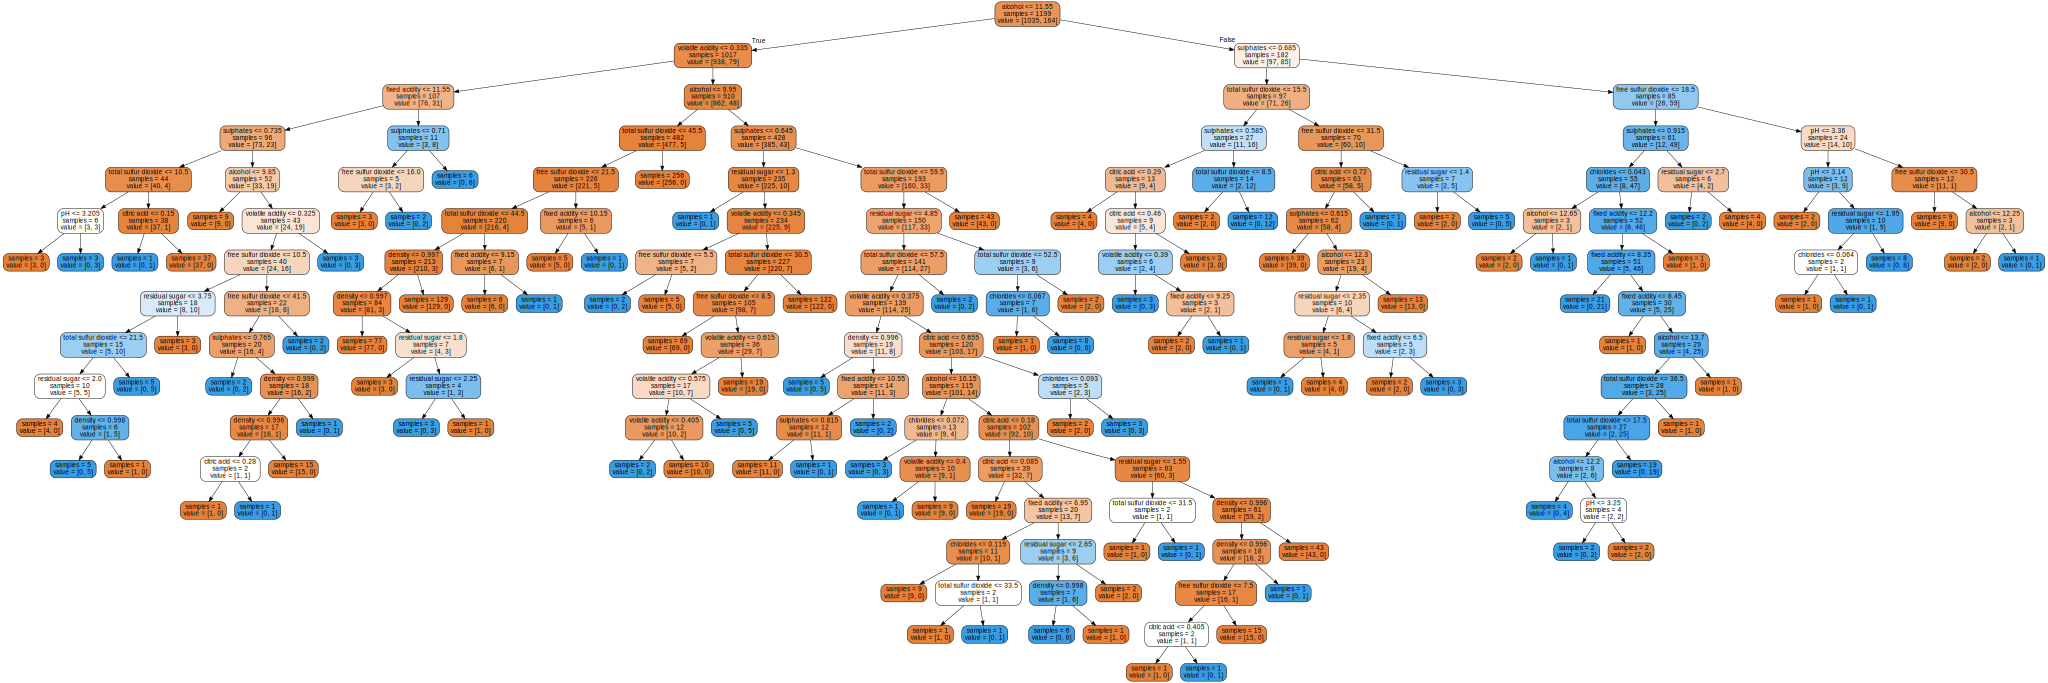

In [60]:
# TODO
features = list(X.columns)
dot_data=export_graphviz(tree,feature_names = features,filled=True, rounded=True, impurity=False)
graph = graphviz.Source(dot_data)
graph

In [61]:
params = {'max_leaf_nodes': list(range(2, 50)),
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': list(range(5, 20))}
grid_cv=GridSearchCV(DecisionTreeClassifier(random_state=0),params,n_jobs=-1,verbose=1)
grid_cv.fit(X_train, y_train)
grid_cv.best_estimator_

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 460 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 5260 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   31.5s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Model Comparison

How would you evaluate and compare model performance?

In [62]:
# TODO
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("SGDClassifier:",SGDClassifier()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("XGBoost:",XGBClassifier()))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Regression: 87.49509803921569
SGDClassifier: 86.57563025210084
Naive Bayes: 83.73459383753502
Decision Tree: 88.32703081232494
Random Forest: 89.24299719887956
XGBoost: 89.33053221288516
AdaBoostClassifier: 87.82773109243698
GradientBoostingClassifier: 89.24439775910365


## Submission

Commit your completed **Week11_classification-and-decision-tree.ipynb** notebook to your personal Github repo you shared with the faculty.